In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:4]

['emma', 'olivia', 'ava', 'isabella']

In [195]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [151]:
def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to p
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context [1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)

    print(X.shape, Y.shape)
    return X, Y

import random 
random.seed (42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182512, 3]) torch.Size([182512])
torch.Size([22860, 3]) torch.Size([22860])
torch.Size([22774, 3]) torch.Size([22774])


In [215]:
g = torch.Generator().manual_seed(123)
C = torch.randn((27,10))
W1 = torch.randn((30,200))
b1 = torch.randn(200)
W2 = torch.randn((200,27))
b2 = torch.randn(27)
parameters = [C,W1,b1,W2,b2]

In [216]:

sum(p.nelement() for p in parameters)

11897

In [217]:
for p in parameters:
    p.requires_grad = True

In [218]:
lossi = []
stepi = []


In [219]:
from tqdm import tqdm

In [228]:

for _ in tqdm(range(10000)):
    #minibatch construct
    ix = torch.randint(0,Xtr.shape[0],(32,))
    #forward
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])

    
    #backward
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(_)
    lossi.append(loss.log10().item())
print(loss.item())

100%|██████████| 10000/10000 [00:08<00:00, 1248.74it/s]

2.230626106262207


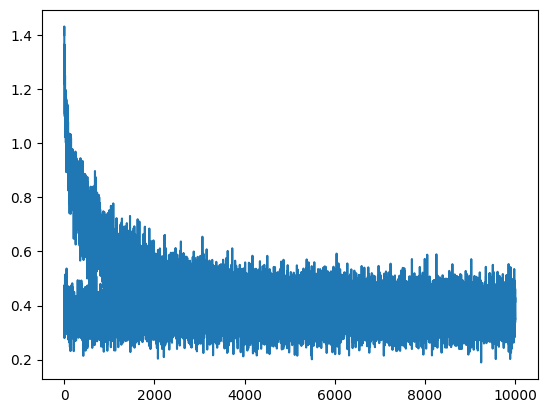

In [229]:
plt.plot(stepi,lossi)

In [230]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30)@W1 +b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.312460422515869

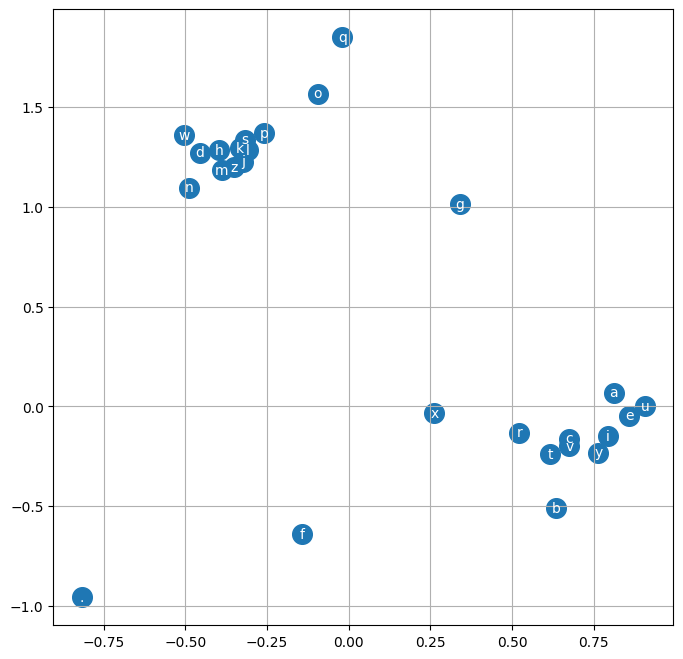

In [231]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s =200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha = 'center', va = 'center', color = 'white')
plt.grid('minor')

In [236]:
g = torch.Generator().manual_seed(1 + 10)
for _ in range(20):
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1,block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix  = torch.multinomial(probs,num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0: 
            break
    print(''.join(itos[i] for i in out))

emye.
pazasavir.
jainee.
luegen.
aynale.
chate.
lax.
nulalopny.
ylan.
lyn.
solun.
dam.
jaleezonse.
trash.
hax.
noe.
jirahe.
niva.
veon.
der.
